C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ความเร็วของการหมุนมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ : 7.611111111111112


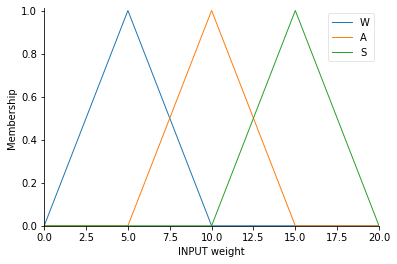

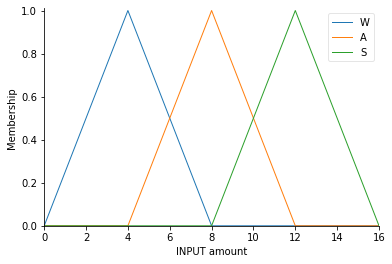

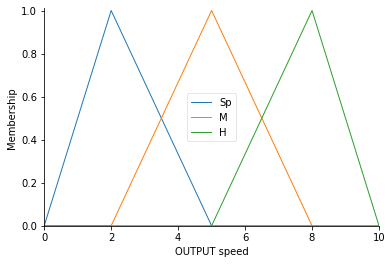

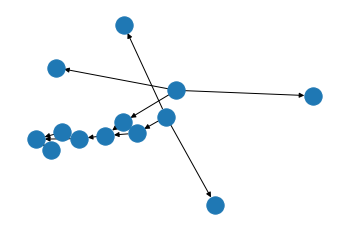

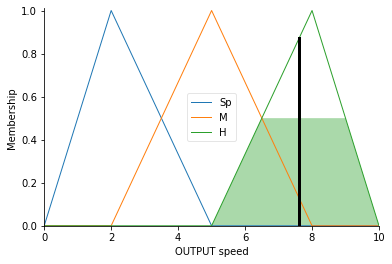

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
weight = ctrl.Antecedent(np.arange(0, 21, 1), 'INPUT weight')
amount = ctrl.Antecedent(np.arange(0, 17, 1), 'INPUT amount')
speed = ctrl.Consequent(np.arange(0, 11, 1), 'OUTPUT speed')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# weight.automf(3)
# amount.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
weight['W'] = fuzz.trimf(weight.universe, [0, 5, 10])
weight['A'] = fuzz.trimf(weight.universe, [5, 10, 15])
weight['S'] = fuzz.trimf(weight.universe, [10, 15, 20])

amount['W'] = fuzz.trimf(amount.universe, [0, 4, 8])
amount['A'] = fuzz.trimf(amount.universe, [4, 8, 12])
amount['S'] = fuzz.trimf(amount.universe, [8, 12, 16])

speed['Sp'] = fuzz.trimf(speed.universe, [0, 2, 5])
speed['M'] = fuzz.trimf(speed.universe, [2, 5, 8])
speed['H'] = fuzz.trimf(speed.universe, [5, 8, 10])
# You can see how these look with .view()
weight.view()
amount.view()
speed.view()


r1 = ctrl.Rule(weight['W'] & amount['A'], speed['Sp'])
r2 = ctrl.Rule(weight['W'] & amount['A'], speed['M'])
r3 = ctrl.Rule(weight['W'] & amount['S'], speed['M'])

r4 = ctrl.Rule(weight['A'] & amount['W'], speed['M'])
r5 = ctrl.Rule(weight['A'] & amount['A'], speed['H'])
r6 = ctrl.Rule(weight['A'] & amount['S'], speed['H'])

r7 = ctrl.Rule(weight['S'] & amount['W'], speed['M'])
r8 = ctrl.Rule(weight['S'] & amount['A'], speed['H'])
r9 = ctrl.Rule(weight['S'] & amount['S'], speed['H'])

r1.view()
speedping_ctrl = ctrl.ControlSystem(
    [r1, r2, r3, r4, r5, r6, r7, r8, r9])
speedping = ctrl.ControlSystemSimulation(speedping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
speedping.input['INPUT weight'] = 15
speedping.input['INPUT amount'] = 10

# Crunch the numbers
speedping.compute()
speed.view(sim=speedping)
print("ความเร็วของการหมุนมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ :",speedping.output['OUTPUT speed'])
###